# Reconocimiento de Patrones
## Dr. Carlos Villaseñor
### Lección 1 - Introducción al Reconocimiento de patrones

Primeramente importemos algunos paquetes


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Introducción a Pandas

Pandas es una biblioteca para Python basada en Numpy y Matplotlib para la manipulacion y el análisisd e datos. Podemos decir que da herramientas propias del lenguaje R a Python 3.

Tiene dos objetos principales las Series y los DataFrame, empezemos con las series

In [2]:
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])
print(s)
print('acceso a elemento: ', s['a'])

a    3
b   -5
c    7
d    4
dtype: int64
acceso a elemento:  3


El objeto DataFrame es el principal objeto de la biblioteca es un arreglo bidimensional de datos mezclados con
encabezado (muy similar a los DataFrame del lenguaje de programación R), acontinuación un ejemplo:

In [3]:
data = { 'Nombre':['Carlos', 'Julia','Fabiola', 'Ernesto'],
'edad':[28,25,56,21],
'calificación':[100,89,48,75]}
# Es muy común llamar df a nuestro DataFrame
df = pd.DataFrame(data)
print(df)

    Nombre  edad  calificación
0   Carlos    28           100
1    Julia    25            89
2  Fabiola    56            48
3  Ernesto    21            75


Para ingresar a cada dato de nuestro DataFrame, lo podemos hacer de las siguientes maneras como si fuera
una matriz

In [4]:
print(df.iat[0,0])
print(df.iat[1,2])
print(df.at[2,'Nombre'])

Carlos
89
Fabiola


Podemos escribir en el DataFrame con la misma indexación

In [5]:
s['b'] = 5
print('s = \n', s)
df.at[0,'Nombre'] = 'Charlie'
print('df = \n', df)

s = 
 a    3
b    5
c    7
d    4
dtype: int64
df = 
     Nombre  edad  calificación
0  Charlie    28           100
1    Julia    25            89
2  Fabiola    56            48
3  Ernesto    21            75


Tambien podemos eliminar filas de las Series y DataFrames

In [7]:
s.drop(['a'])
print(s)
df.drop('calificación', axis=1)
print(df)
df = df[df.Nombre != 'Charlie']
print(df)

a    3
b    5
c    7
d    4
dtype: int64
    Nombre  edad  calificación
0  Charlie    28           100
1    Julia    25            89
2  Fabiola    56            48
3  Ernesto    21            75
    Nombre  edad  calificación
1    Julia    25            89
2  Fabiola    56            48
3  Ernesto    21            75


## Exploración de datos con Pandas

In [8]:
from google.colab import files
uploaded = files.upload()

Saving countries.csv to countries.csv


Podemos leer el csv de la siguiente manera

In [0]:
df = pd.read_csv('countries.csv')

Cuando se sabe poco de los datos que estamos leyendo es buena costumbre hacer una exploración de los
datos por ejemplo con las siguientes funciones

In [10]:
# Se imprimen los primeros cinco regristros
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [11]:
# Se imprimen los últimos cinco registros
df.tail()

,country,year,pop,continent,lifeExp,gdpPercap
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143.0,Africa,43.487,469.709298


In [12]:
# Tamaño del DataFrame
print(df.shape)

(1704, 6)


In [13]:
# Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [14]:
# Mostrar columnas
df.columns

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')

In [15]:
# Datos estadísticos de las variables númericas
df.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165877
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846989
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [16]:
# Crear una matrix de datos
df.values

array([['Afghanistan', 1952, 8425333.0, 'Asia', 28.801, 779.4453145],
       ['Afghanistan', 1957, 9240934.0, 'Asia', 30.331999999999997,
        820.8530296],
       ['Afghanistan', 1962, 10267083.0, 'Asia', 31.997,
        853.1007099999999],
       ...,
       ['Zimbabwe', 1997, 11404948.0, 'Africa', 46.809,
        792.4499602999999],
       ['Zimbabwe', 2002, 11926563.0, 'Africa', 39.989000000000004,
        672.0386227000001],
       ['Zimbabwe', 2007, 12311143.0, 'Africa', 43.486999999999995,
        469.70929810000007]], dtype=object)

In [17]:
# Renombrar columnas
df = df.rename(columns={'gdpPercap':'gdp'})
df.head()

,country,year,pop,continent,lifeExp,gdp
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [19]:
# Regresar una columna como Series
s1 = df['country']
s2 = df.country
print(s1)
print(s2)

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object
0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object


In [21]:
# Regresar una columna como un DataFrame
df2 = df[['country']]
print(df2.head())

       country
0  Afghanistan
1  Afghanistan
2  Afghanistan
3  Afghanistan
4  Afghanistan


In [22]:
# Cambiar todos los elementos con cierto valor
df2 = df.replace(1952,'one')
df2.head()

,country,year,pop,continent,lifeExp,gdp
0,Afghanistan,one,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [23]:
# Filtrado por columna
df[df.country == 'Mexico']

,country,year,pop,continent,lifeExp,gdp
984,Mexico,1952,30144317.0,Americas,50.789,3478.125529
985,Mexico,1957,35015548.0,Americas,55.190,4131.546641
986,Mexico,1962,41121485.0,Americas,58.299,4581.609385
987,Mexico,1967,47995559.0,Americas,60.110,5754.733883
988,Mexico,1972,55984294.0,Americas,62.361,6809.406690
989,Mexico,1977,63759976.0,Americas,65.032,7674.929108
990,Mexico,1982,71640904.0,Americas,67.405,9611.147541
991,Mexico,1987,80122492.0,Americas,69.498,8688.156003
992,Mexico,1992,88111030.0,Americas,71.455,9472.384295
993,Mexico,1997,95895146.0,Americas,73.670,9767.297530


In [25]:
#Filtrado con reindexado automático
df_mex = df[df.country == 'Mexico'][df.year >= 1977][df.lifeExp < 70]
print(df_mex)

    country  year         pop continent  lifeExp          gdp
989  Mexico  1977  63759976.0  Americas   65.032  7674.929108
990  Mexico  1982  71640904.0  Americas   67.405  9611.147541
991  Mexico  1987  80122492.0  Americas   69.498  8688.156003


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [26]:
df_mex = df_mex.reset_index()
df_mex = df_mex.drop('index', axis=1)
print(df_mex)

  country  year         pop continent  lifeExp          gdp
0  Mexico  1977  63759976.0  Americas   65.032  7674.929108
1  Mexico  1982  71640904.0  Americas   67.405  9611.147541
2  Mexico  1987  80122492.0  Americas   69.498  8688.156003


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa28e5c63c8>,
      dtype=object)

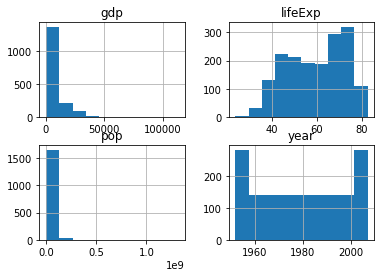

In [27]:
# Histograma de las variables numericas
df.hist()

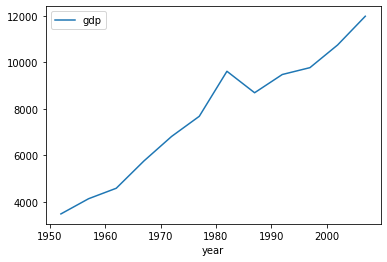

In [28]:
df[df.country == 'Mexico'].plot(x='year',y='gdp')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa28df5cd68>,
      dtype=object)

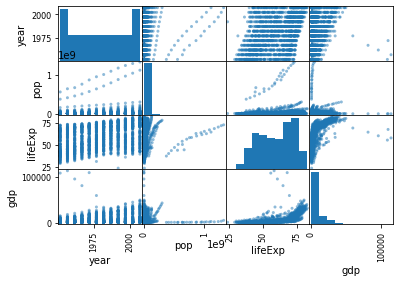

In [29]:
pd.plotting.scatter_matrix(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa28dd6e2b0>,
      dtype=object)

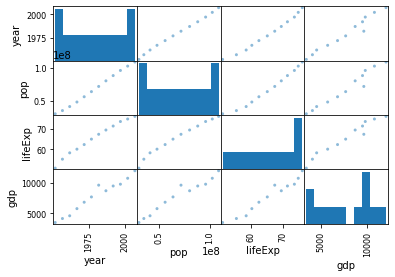

In [30]:
# Grafica de México
pd.plotting.scatter_matrix(df[df.country == 'Mexico'])

## Regresión lineal y KNN

En está sección vamos a hacer una regresión lineal simple de la esperanza de vida en México y también usaremos KNN

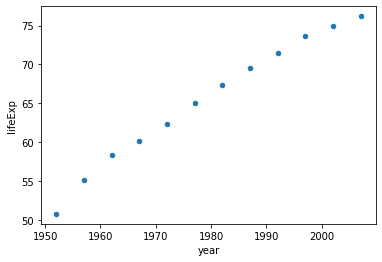

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
df_mex = df[df.country == 'Mexico']
df_mex.plot.scatter(x='year',y='lifeExp')

Para este ejemplo la variable 'year' será nuestra variable independiente y la variable 'lifeExp' sera nuestra
variable dependiente.

In [0]:
x = np.asarray(df_mex[['year']])
y = np.asarray(df_mex[['lifeExp']])

Ahora instanciaremos el modelo lineal y entrenaremos de forma supervisada

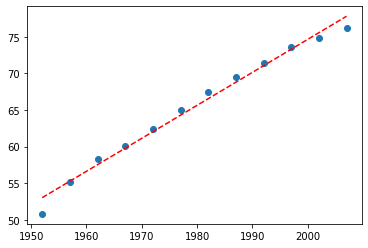

In [43]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,'--r')

Con el modelo ya entrenado podemos hacer predicciones con él!!

In [44]:
model.predict([[2020]])

array([[83.67574942]])

Hagamos lo mismo pero con el modelo KNN


array([[74.92233333]])

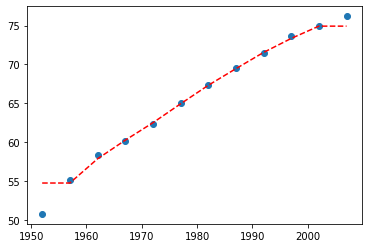

In [45]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x,y)
y_pred = knn.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,'--r')
knn.predict([[2020]])

## Métricas en el Problema de Regresión

In [50]:
import sklearn.metrics as m 
print(m.mean_absolute_error(y,y_pred))
print(m.max_error(y,y_pred))
print(m.mean_squared_error(y,y_pred))
print(m.mean_squared_log_error(y,y_pred))
print(m.median_absolute_error(y,y_pred))
print(m.explained_variance_score(y,y_pred))
print(m.r2_score(y,y_pred))

0.5887499999999998
3.970333333333336
1.4944017314814835
0.0004901248152151435
0.14333333333333087
0.9760188479438794
0.975707148187642


In [53]:
linear_score = model.score(x,y)
knn_score = knn.score(x,y)
print('Lineal Approximation: ', linear_score)
print('KNN Approximation: ', knn_score)

Lineal Approximation:  0.9852044388728111
KNN Approximation:  0.975707148187642
